In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [4]:
df = pd.read_csv("./final_group_2/data/hsls_17_student_pets_sr_v1_0.csv",
                 usecols=['X1TXMTSCOR','X2TXMTSCOR','X1PAREDU','X2PAREDU','X1MTHINT','X2MTHINT_R','X1SCIINT','X2SCIINT','X1SES','X4X2SES','X3TGPAHIMTH','X3TGPAHISCI','X3TGPASTEM','X3TGPAACAD'])

df_categorical = df[['X2PAREDU','X1PAREDU','X3TGPAHIMTH','X3TGPAHISCI','X3TGPASTEM','X3TGPAACAD']]
df_numerical = df.drop(columns=(['X2PAREDU', 'X1PAREDU','X3TGPAHIMTH','X3TGPAHISCI','X3TGPASTEM','X3TGPAACAD']), axis=1)

descriptions = {
    "X1TXMTSCOR": "X1 Mathematics standardized theta score",
    "X2TXMTSCOR": "X2 Mathematics standardized theta score",
    "X1PAREDU": "X1 Parents'/guardians' highest level of education",
    "X2PAREDU": "X2 Parents'/guardians' highest level of education",
    "X1MTHINT": "X1 Scale of student's interest in fall 2009 math course",
    "X2MTHINT_R": "X2 Scale of student's interest in fall 2009 math course (REVISED)",
    "X1SCIINT": "X1 Scale of student's interest in fall 2009 science course",
    "X2SCIINT": "X2 Scale of student's interest in fall 2009 science course",
    "X1SES": "X1 Socio-economic status composite",
    "X4X2SES": "X4 Revised X2 Socio-economic status composite",
    "X3TGPAHIMTH": "X3 GPA - highest level mathematics course taken",
    "X3TGPAHISCI": "X3 GPA - highest level science course taken",
    "X3TGPASTEM": "X3 GPA for STEM courses",
    "X3TGPAACAD": "X3 GPA for all academic courses"
}

questions = {
    "X2PAREDU" : '''
    X2PAREDU
   1 = "Less than high school"
   2 = "High school diploma or GED or alterntive HS credential"
   3 = "Certificate/diploma from school providing occupational training"
   4 = "Associate's degree"
   5 = "Bachelor's degree"
   6 = "Master's degree"
   7 = "Ph.D/M.D/Law/other high lvl prof degree"
   -8 = "Unit non-response"
   ''',
    "X1PAREDU": '''
    X1PAREDU
   1 = "Less than high school"
   2 = "High school diploma or GED"
   3 = "Associate's degree"
   4 = "Bachelor's degree"
   5 = "Master's degree"
   7 = "Ph.D/M.D/Law/other high lvl prof degree"
   -8 = "Unit non-response"
   -9 = "Missing"
   '''
}

# X1TXMTSCOR  - X1 Mathematics standardized theta score
# X2TXMTSCOR  - X2 Mathematics standardized theta score
# X1PAREDU    - X1 Parents'/guardians' highest level of education
# X2PAREDU    - X2 Parents'/guardians' highest level of education
# X1MTHINT    - X1 Scale of student's interest in fall 2009 math course
# X2MTHINT_R  - X2 Scale of student's interest in fall 2009 math course (REVISED)
# X1SCIINT    - X1 Scale of student's interest in fall 2009 science course
# X2SCIINT    - X2 Scale of student's interest in fall 2009 science cours
# X1SES       - X1 Socio-economic status composite
# X4X2SES     - X4 Revised X2 Socio-economic status composite
# X3TGPAHIMTH - X3 GPA - highest level mathematics course taken
# X3TGPAHISCI - X3 GPA - highest level science course taken
# X3TGPASTEM  - X3 GPA for STEM courses
# X3TGPAACAD  - X3 GPA for all academic courses

# NUMERICAL DATA

X1 Mathematics standardized theta score

Encoded Values:
X1TXMTSCOR
-8.0    2059
Name: count, dtype: int64

Mean: 45.931



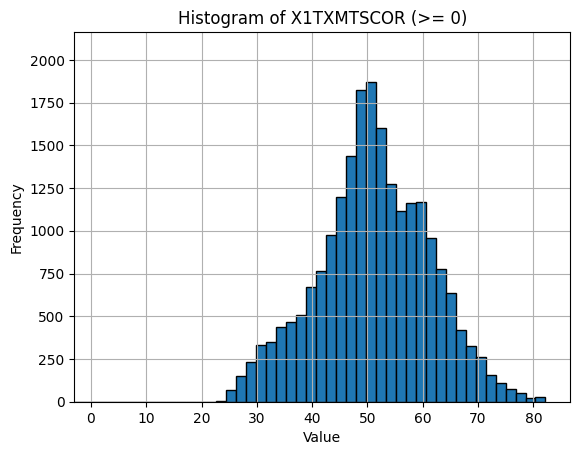

X1 Socio-economic status composite

Encoded Values:
X1SES
-8.0    2059
Name: count, dtype: int64

Mean: -0.65149



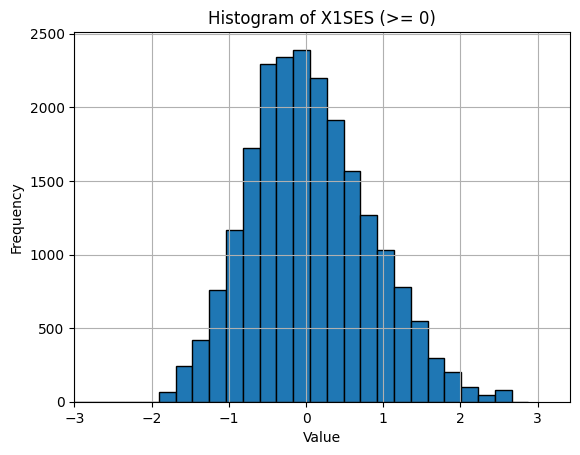

X1 Scale of student's interest in fall 2009 math course

Encoded Values:
X1MTHINT
-7.0    2113
-8.0    2059
-9.0     937
Name: count, dtype: int64

Mean: -1.6607



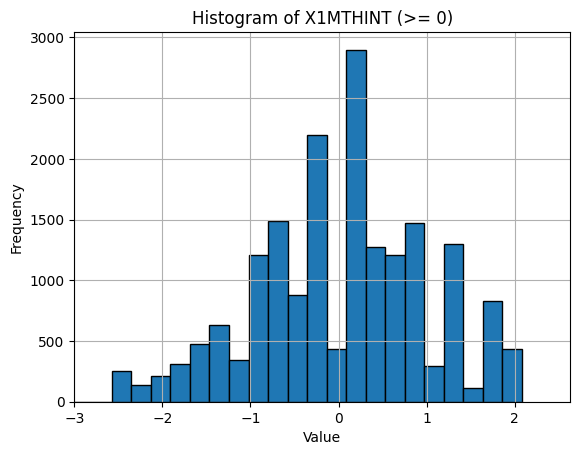

X1 Scale of student's interest in fall 2009 science course

Encoded Values:
X1SCIINT
-7.0    3610
-8.0    2059
-9.0     905
Name: count, dtype: int64

Mean: -2.0993



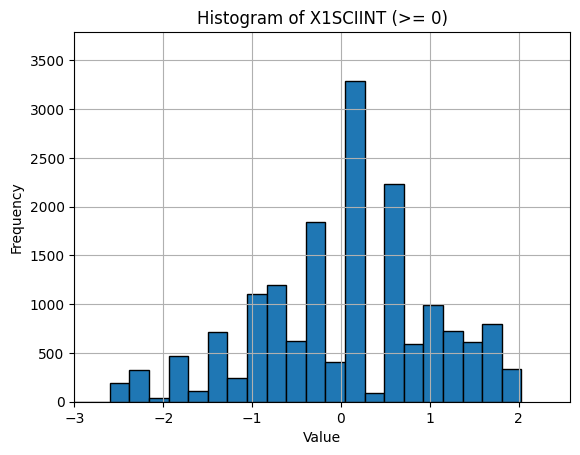

X2 Mathematics standardized theta score

Encoded Values:
X2TXMTSCOR
-8.0    2909
Name: count, dtype: int64

Mean: 44.136



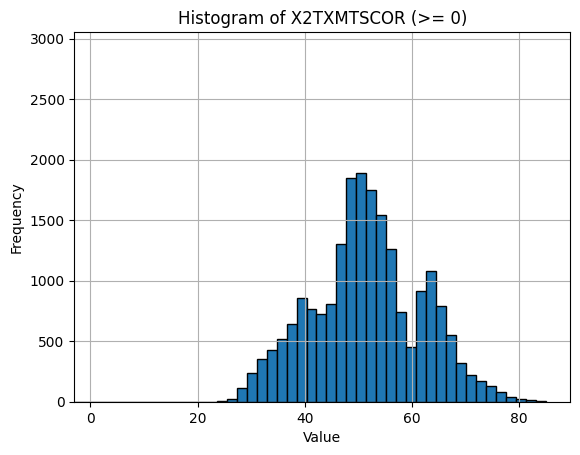

X2 Scale of student's interest in fall 2009 math course (REVISED)

Encoded Values:
X2MTHINT_R
-8.0    2909
-7.0    2720
-9.0    1027
Name: count, dtype: int64

Mean: -2.1744



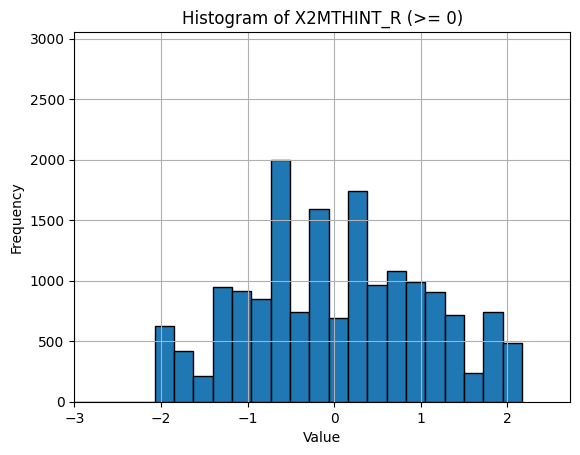

X2 Scale of student's interest in fall 2009 science course

Encoded Values:
X2SCIINT
-7.0    4301
-8.0    2909
-9.0    1069
Name: count, dtype: int64

Mean: -2.6561



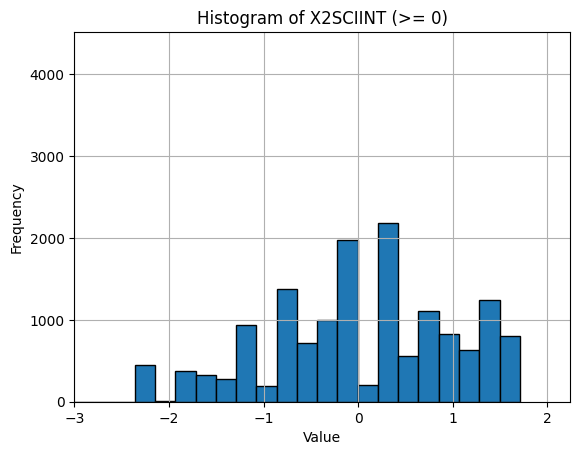

X4 Revised X2 Socio-economic status composite

Encoded Values:
X4X2SES
-8.0    2584
Name: count, dtype: int64

Mean: -0.8021



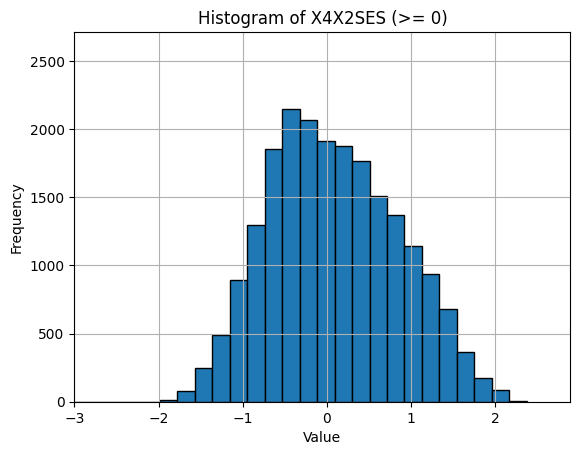

In [5]:
# numerical data
for column_name in df_numerical.columns:

    nulls = df_numerical[df[column_name] <= -5][column_name]
    print(descriptions[str(column_name)])
    print(f'\nEncoded Values:\n{nulls.value_counts()}\n')
    print(f'Mean: {df_numerical[column_name].mean():.5}\n')
    
    df_numerical[column_name].hist(bins=50, edgecolor='black') 
    plt.title(f'Histogram of {column_name} (>= 0)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim(-3)
    plt.show()
    

# CATEGORICAL DATA

X2 Parents'/guardians' highest level of education

Encoded Values:
X2PAREDU
-8    2584
Name: count, dtype: int64

Mode: 2

    X2PAREDU
   1 = "Less than high school"
   2 = "High school diploma or GED or alterntive HS credential"
   3 = "Certificate/diploma from school providing occupational training"
   4 = "Associate's degree"
   5 = "Bachelor's degree"
   6 = "Master's degree"
   7 = "Ph.D/M.D/Law/other high lvl prof degree"
   -8 = "Unit non-response"
   


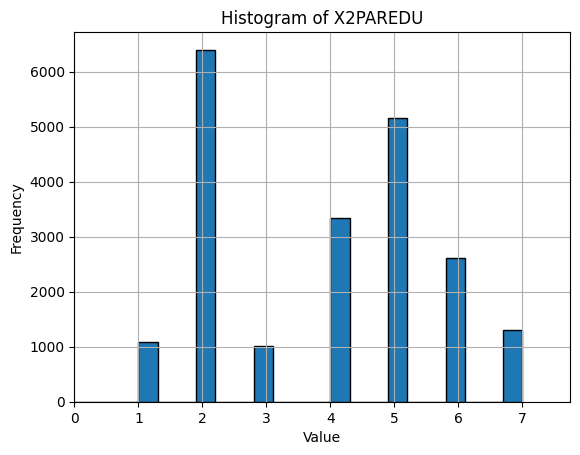

X1 Parents'/guardians' highest level of education

Encoded Values:
X1PAREDU
-8    6715
-9       6
Name: count, dtype: int64

Mode: -8

    X1PAREDU
   1 = "Less than high school"
   2 = "High school diploma or GED"
   3 = "Associate's degree"
   4 = "Bachelor's degree"
   5 = "Master's degree"
   7 = "Ph.D/M.D/Law/other high lvl prof degree"
   -8 = "Unit non-response"
   -9 = "Missing"
   


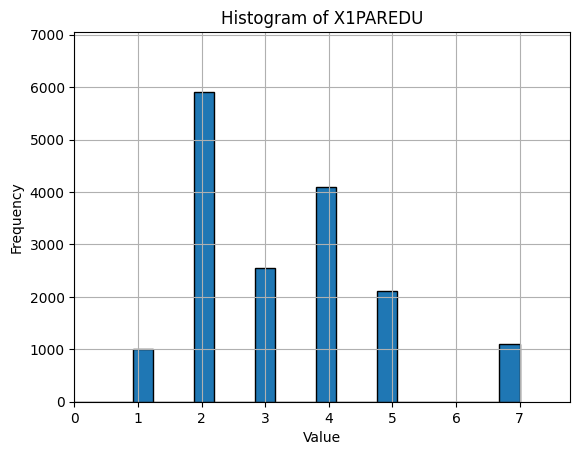

X3 GPA - highest level mathematics course taken

Encoded Values:
X3TGPAHIMTH
-8.0    1575
-9.0     705
Name: count, dtype: int64

Mode: 2.0



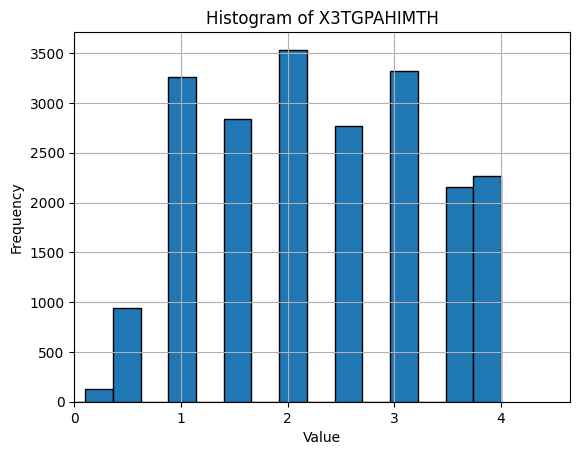

X3 GPA - highest level science course taken

Encoded Values:
X3TGPAHISCI
-8.0    1575
-9.0     724
Name: count, dtype: int64

Mode: 3.0



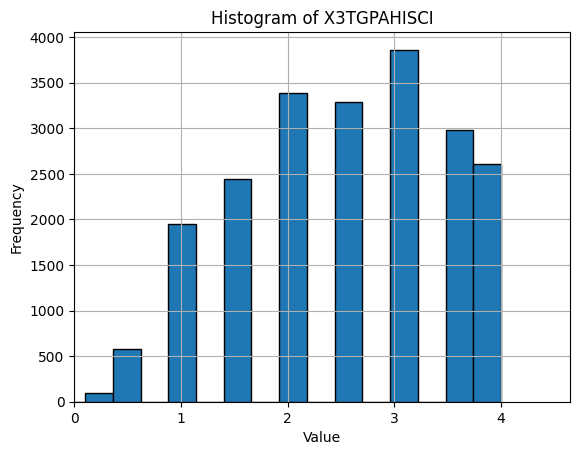

X3 GPA for STEM courses

Encoded Values:
X3TGPASTEM
-8.0    1575
-9.0      42
Name: count, dtype: int64

Mode: 2.5



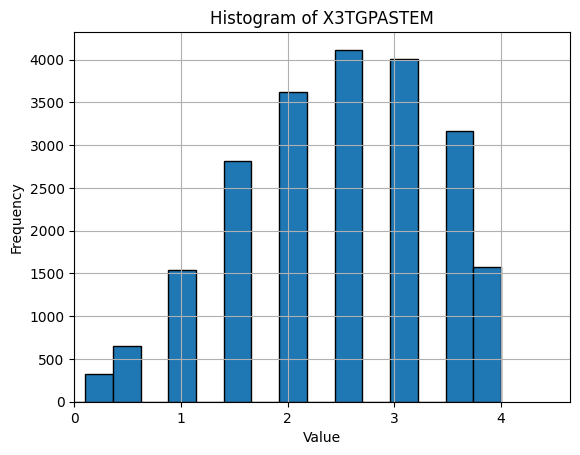

X3 GPA for all academic courses

Encoded Values:
X3TGPAACAD
-8.0    1575
-9.0      40
Name: count, dtype: int64

Mode: 3.0



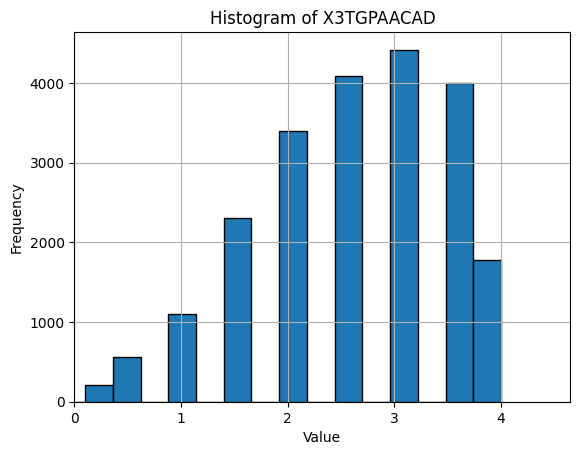

In [6]:
# categorical data
for column_name in df_categorical:

    nulls = df_categorical[df[column_name] <= -5][column_name]
    print(descriptions[str(column_name)])
    print(f'\nEncoded Values:\n{nulls.value_counts()}\n')
    print(f'Mode: {df_categorical[column_name].mode()[0]}')
    print(questions.get(column_name, ''))
    
    df_categorical[column_name].hist(bins=50, edgecolor='black') 
    plt.title(f'Histogram of {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim(0)
    plt.show()